## Predicting the used car price with another data where Present selling price is absent.
1. As we saw in the previous prediction, Present selling price is one of the significant feature. Let's see how the we deal without present selling price 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data = pd.read_csv("C:/Users/asus/Desktop/CarDekho/CAR_DETAILS_FROM_CAR_DEKHO.csv")

In [3]:
car_data.shape

(4340, 8)

In [4]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
print("Type of Seller:",car_data.seller_type.unique())
print("Type of Transmission:",car_data.transmission.unique())
print("Type of Ownership:",car_data.owner.unique())
print("Type of Fuel:",car_data.fuel.unique())

Type of Seller: ['Individual' 'Dealer' 'Trustmark Dealer']
Type of Transmission: ['Manual' 'Automatic']
Type of Ownership: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
Type of Fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [6]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
data_car_final = car_data.drop('name', axis =1 )

In [9]:
data_car_final

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [10]:
data_car_final['Current_Year'] = 2020

In [11]:
data_car_final['Car_Used_Years'] = data_car_final['Current_Year'] - data_car_final['year']

In [12]:
data_car_final.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year,Car_Used_Years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [13]:
data_car_final = data_car_final.drop(['year','Current_Year'], axis = 1 )

In [14]:
data_car_final = pd.get_dummies(data_car_final, drop_first = True)

In [15]:
data_car_final

,selling_price,km_driven,Car_Used_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,11,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,4,1,0,0,0,1,0,1,0,0,0,0


In [16]:
##Cars having less km_driven
data_car_final[data_car_final["km_driven"] < 100]

,selling_price,km_driven,Car_Used_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1312,250000,1,6,1,0,0,0,1,0,1,0,1,0,0


In [17]:
## Here we can see that the car is six years old and was driven only 1 km 
## Lets delete it
data_car_final2 = data_car_final.drop(data_car_final.index[1312])

In [18]:
data_car_final2

,selling_price,km_driven,Car_Used_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,11,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,4,1,0,0,0,1,0,1,0,0,0,0


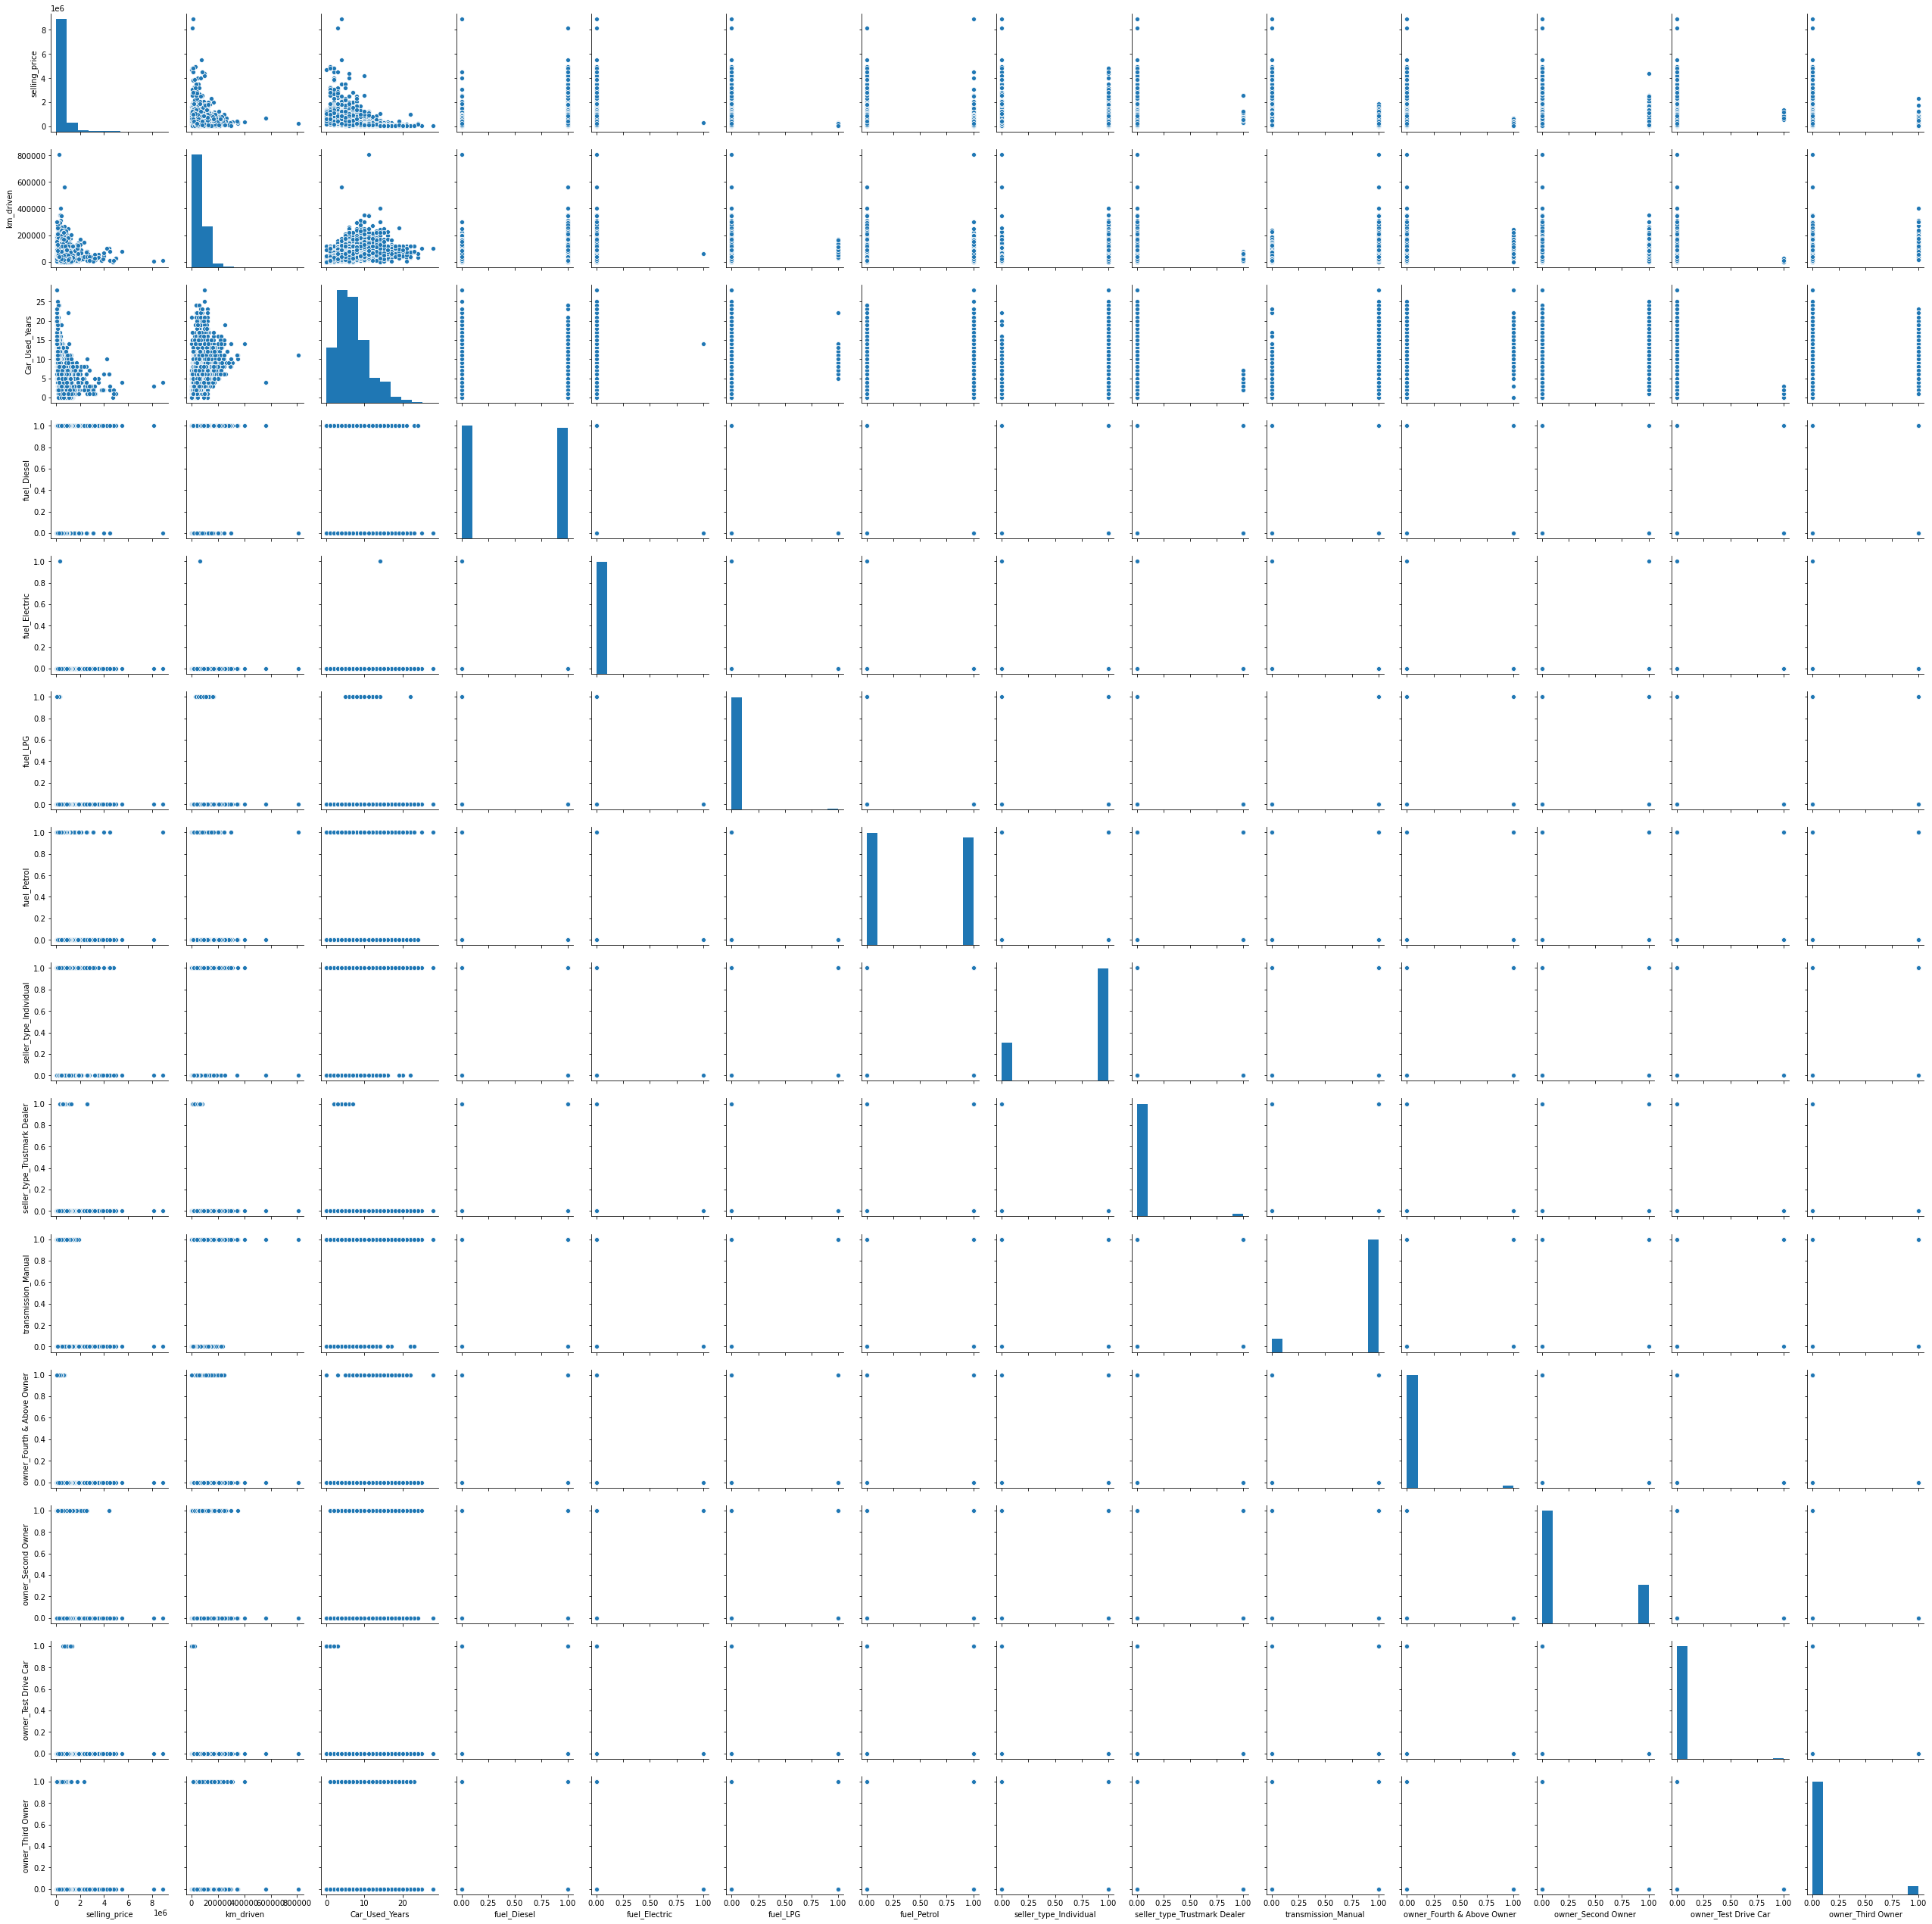

In [19]:
sns.pairplot(data_car_final)

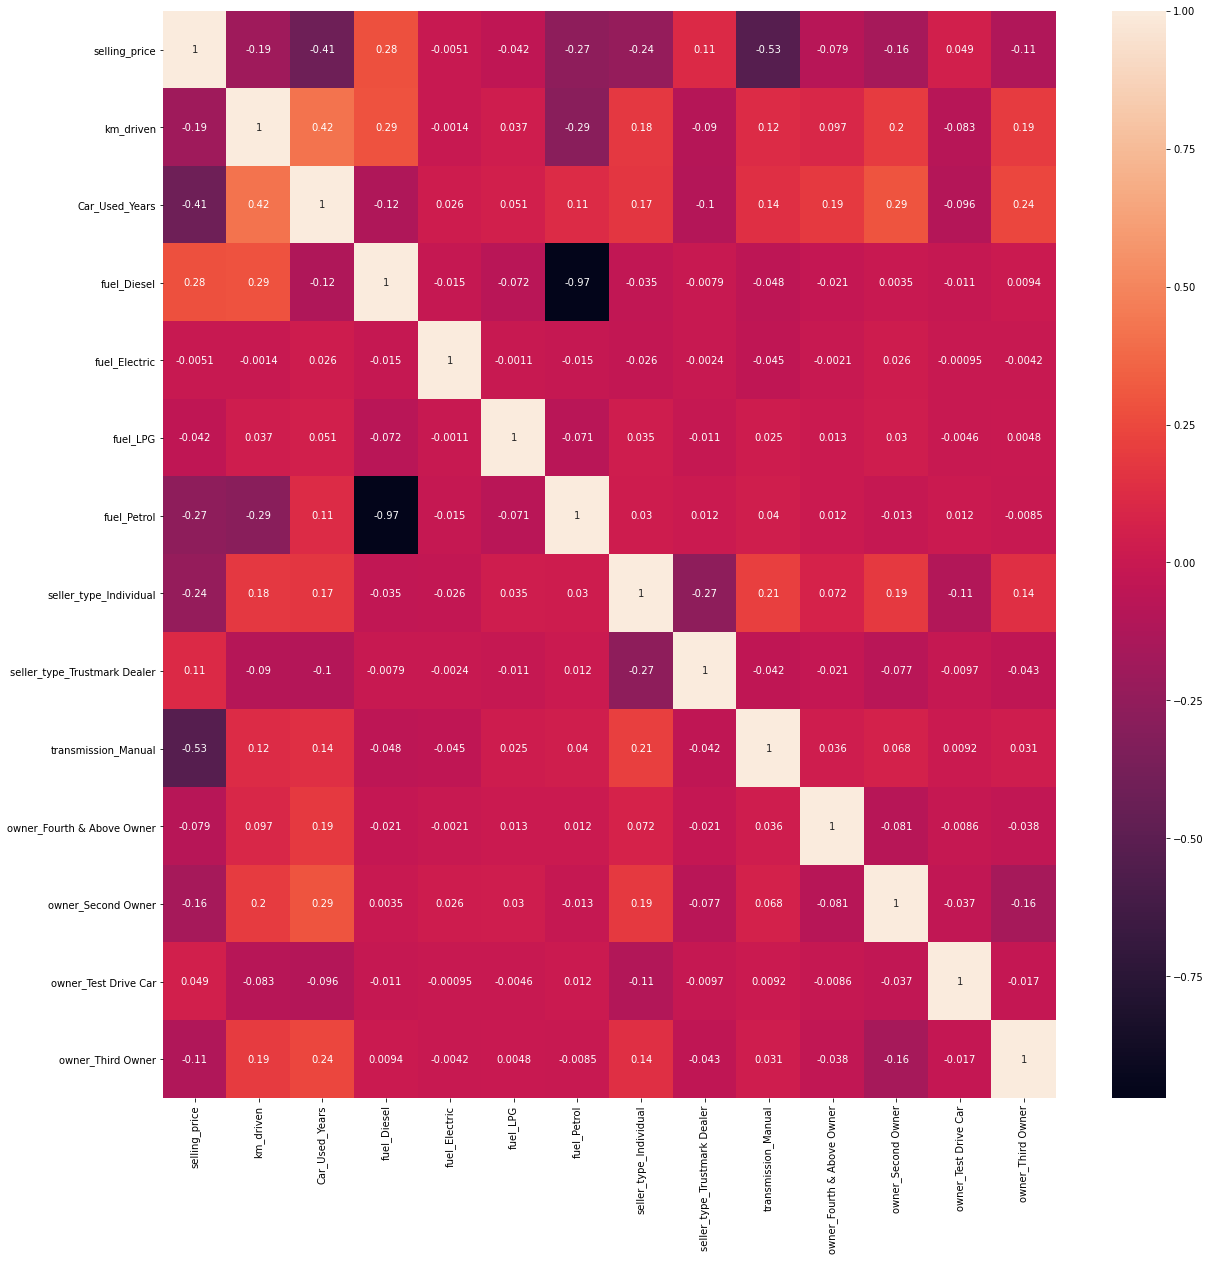

In [20]:
correlation_mat = data_car_final.corr()
corr_features = correlation_mat.index
plt.figure(figsize = (20,20))
## heat map
sns.heatmap(data_car_final[corr_features].corr(), annot = True)

In [21]:
corr_features

Index(['selling_price', 'km_driven', 'Car_Used_Years', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [22]:
X = data_car_final.iloc[:,1:]
Y=data_car_final.iloc[:,0]

In [23]:
X.head()

,km_driven,Car_Used_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [24]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [25]:
 ## feature selection
    
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[2.47840720e-01 2.48793067e-01 1.30128712e-01 5.32027268e-05
 2.42918452e-05 1.90698740e-04 4.35376501e-02 8.27123899e-03
 2.92828524e-01 8.98291946e-04 2.21240286e-02 8.03672952e-04
 4.50590215e-03]


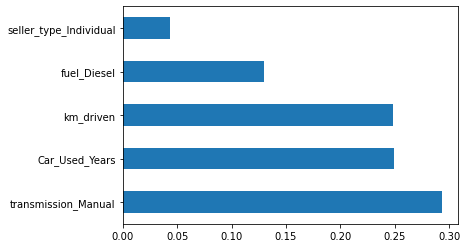

In [28]:
plt_features = pd.Series(model.feature_importances_, index = X.columns)
plt_features.nlargest(5).plot(kind = 'barh')
plt.show()

## Important features were not the same as the previous ones. Now, the transmission model is significantly affecting the outcome.

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
## Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop =1200, num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
##features to consider at every split
max_feaures = ['auto' , 'sqrt']
##Max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num =6)]
## Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
## Creating random grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_feaures,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
rf = RandomForestRegressor()

In [36]:
rf_random = RandomizedSearchCV(estimator= rf , param_distributions= random_grid,
                              scoring = 'neg_mean_squared_error', n_iter = 10,
                              cv =5, verbose =2, random_state = 42,n_jobs  = 1)

In [37]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
predictions = rf_random.predict(X_test)

In [39]:
predictions

array([356899.02086802, 478563.33333333, 323211.986     , ...,
       590970.6030303 , 284581.65666667,  67388.05919048])

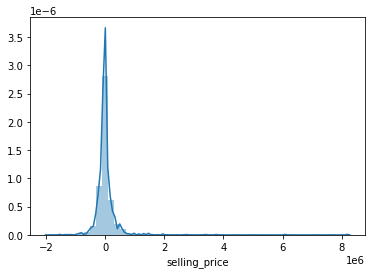

In [40]:
sns.distplot(Y_test - predictions)

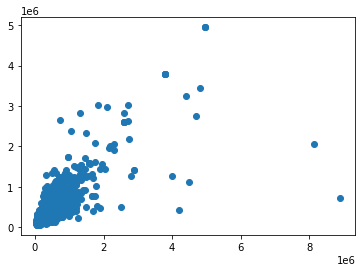

In [41]:
plt.scatter(Y_test, predictions)